In [94]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#import psycopg2
#import textatistic
import seaborn as sbn
import requests
import plotly as py
import networkx as nx
import numpy as np
matplotlib.style.use('ggplot')
#print(py.__version__) #version 1.9.4 required
py.offline.init_notebook_mode() 

In [5]:
aisles = pd.read_csv('/home/faculty/millbr02/pub/ecomm/aisles.csv')
departments = pd.read_csv('/home/faculty/millbr02/pub/ecomm/departments.csv')
orders =  pd.read_csv('/home/faculty/millbr02/pub/ecomm/orders.csv')
products = pd.read_csv('/home/faculty/millbr02/pub/ecomm/products.csv')
op = pd.read_csv('/home/faculty/millbr02/pub/ecomm/order_products__train.csv')
aisles = pd.read_csv('/home/faculty/millbr02/pub/ecomm/aisles.csv')

In [6]:
op.merge(orders, on=['order_id']).merge(products).head()

order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         1       49302                  1          1   112108    train   
1    816049       49302                  7          1    47901    train   
2   1242203       49302                  1          1     2993    train   
3   1383349       49302                 11          1    41425    train   
4   1787378       49302                  8          0   187205    train   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0             4          4                 10                     9.0   
1            14          4                  6                    16.0   
2            15          0                  7                     7.0   
3             4          3                  8                    14.0   
4             5          4                 14                    30.0   

       product_name  aisle_id  department_id  
0  Bulgarian Yogurt       120             16  
1  Bulgarian Yogurt       120             16  
2  Bulgarian Yogurt       120             16  
3  Bulgarian Yogurt       120             16  
4  Bulgarian Yogurt       120             16

In [7]:
aco = op.groupby('order_id')['add_to_cart_order'].max()
aco = pd.DataFrame(aco)
aco = aco.reset_index()
aco.head()

order_id  add_to_cart_order
0         1                  8
1        36                  8
2        38                  9
3        96                  7
4        98                 49

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fb229d8a278>],
 'cbars': <matplotlib.collections.LineCollection at 0x7fb229d8ac18>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fb229d8a6d8>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7fb229d8a160>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fb229d8a978>}

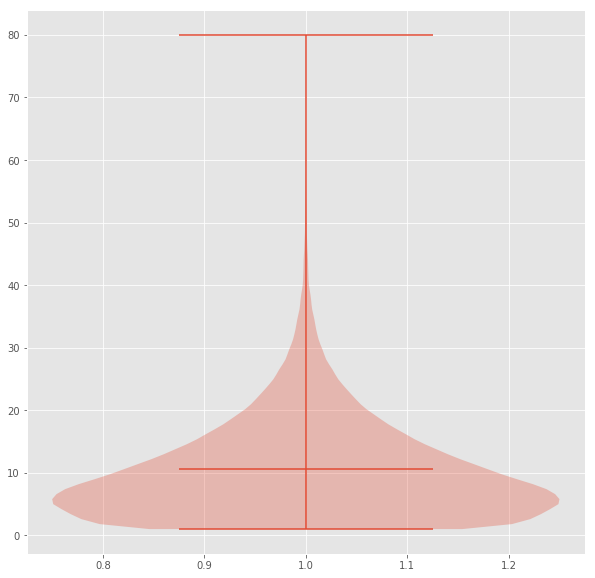

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

axes.violinplot(aco['add_to_cart_order'], showmeans=True, showmedians=False)

(array([  6.84500000e+03,   7.36800000e+03,   8.03300000e+03,
          8.21800000e+03,   0.00000000e+00,   8.89500000e+03,
          8.70800000e+03,   8.54100000e+03,   7.98300000e+03,
          0.00000000e+00,   7.21700000e+03,   6.55300000e+03,
          6.03400000e+03,   5.38300000e+03,   0.00000000e+00,
          4.84300000e+03,   4.39400000e+03,   3.83100000e+03,
          3.52200000e+03,   0.00000000e+00,   3.10800000e+03,
          2.71900000e+03,   2.47300000e+03,   0.00000000e+00,
          2.10200000e+03,   1.85700000e+03,   1.68100000e+03,
          1.46200000e+03,   0.00000000e+00,   1.29200000e+03,
          1.07900000e+03,   9.86000000e+02,   8.60000000e+02,
          0.00000000e+00,   6.79000000e+02,   6.34000000e+02,
          5.53000000e+02,   4.46000000e+02,   0.00000000e+00,
          4.03000000e+02,   3.46000000e+02,   3.15000000e+02,
          0.00000000e+00,   2.80000000e+02,   2.10000000e+02,
          1.93000000e+02,   1.78000000e+02,   0.00000000e+00,
        

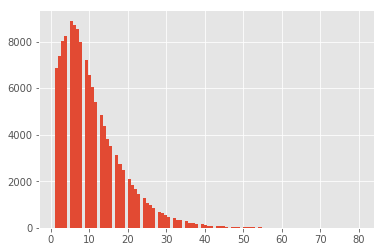

In [9]:
plt.hist(aco['add_to_cart_order'],bins=100)

In [10]:
t= pd.pivot_table(op[op.order_id<50], values=['add_to_cart_order'], index= 'order_id', columns= 'product_id')


In [11]:
t.iloc[1][t.iloc[1].notnull()]

                   product_id
add_to_cart_order  19660         2.0
                   34497         6.0
                   39612         1.0
                   43086         4.0
                   46620         5.0
                   46979         8.0
                   48679         7.0
                   49235         3.0
Name: 36, dtype: float64

In [12]:
t.head(5)

add_to_cart_order                                                  \
product_id             4461  10246 11109 11913 13176 18159 19660 21616 22035   
order_id                                                                       
1                        NaN   3.0   2.0   NaN   6.0   NaN   NaN   NaN   8.0   
36                       NaN   NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   
38                       3.0   NaN   NaN   1.0   NaN   2.0   NaN   4.0   NaN   

                  ...                                                         \
product_id 23622  ...  42625 43086 43633 46620 46979 47209 48679 49235 49302   
order_id          ...                                                          
1            NaN  ...    NaN   NaN   5.0   NaN   NaN   7.0   NaN   NaN   1.0   
36           NaN  ...    NaN   4.0   NaN   5.0   8.0   NaN   7.0   3.0   NaN   
38           5.0  ...    8.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                  
product_id 49683  
order_id          
1            4.0  
36           NaN  
38           NaN  

[3 rows x 25 columns]

In [62]:
#sm ={}
#aco.groups.keys()
#aco = op.groupby('order_id')
#for i in aco.groups.keys():
#    if i<100:
#        print(i)
#        ptint(aco.get_group(i)['product_id'])

In [13]:
msk = np.random.rand(len(op))< .8
train = op[msk]
test = op[~msk]

In [14]:
print(len(train))
print(len(test))

1108125
276492


In [47]:
aco = train.groupby('order_id')
#aco = test.groupby('order_id')

In [48]:
aco.get_group(36)['product_id']

8     39612
9     19660
10    49235
12    46620
15    46979
Name: product_id, dtype: int64

In [49]:
unique_orderids = aco.groups.keys()

In [50]:
#item-item-matrix

In [51]:
%%time
iimat= {}
for oid in unique_orderids:
    for product1 in aco.get_group(oid)['product_id']:
        if int(product1) not in iimat:
            iimat[int(product1)] = {}
            for product2 in aco.get_group(oid)['product_id']:
                if product1 != product2:
                    iimat[int(product1)][int(product2)]= iimat[int(product1)].get(int(product2),0) +1

CPU times: user 1min 7s, sys: 508 ms, total: 1min 8s
Wall time: 1min 8s


In [52]:
%%time
msofar = 0
ones = 0
for key in iimat:
    for i in iimat[key]:
        if iimat[key][i] == 1:
            ones +=1
        if iimat[key][i] > msofar:
            msofar = iimat[key][i]
            print(key,i,msofar)

1 6184 1
CPU times: user 228 ms, sys: 12 ms, total: 240 ms
Wall time: 234 ms


In [53]:
delkeys = []
for i in iimat[i].keys():
    for k,v in iimat[i].items():
        if v == 1:
            delkeys.append((i,k))
len(delkeys)

25

In [54]:
for i, j in delkeys:
    del iimat[i][j]


In [55]:
import json
with open ('item_item.json', 'w') as f:
    json.dump(iimat,f)

In [70]:
suggs = pd.read_json('/home/faculty/millbr02/pub/item_item.json')
suggs.head()

1      10     100    1000   10000  10001  10005  10006  10008  10009  \
1        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
100      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1000     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10005    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ...    9985   9986   9989   999    9990   9993   9995   9996   9997   \
1      ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10     ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
100    ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1000   ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10005  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       9998   
1        NaN  
10       NaN  
100      NaN  
1000     NaN  
10005    NaN  

[5 rows x 37311 columns]

In [56]:
#t = pd.DataFrame(iimat).to_sparse()

In [57]:
#t.head()

In [58]:
def getval(d):
    return d[1]
recs = sorted(iimat[13176].items(), key = getval, reverse = True)

In [59]:
for rec in recs [:10]:
    print(products[products.product_id == rec[0]].product_name)

5024    Green Onions
Name: product_name, dtype: object
39697    Garlic Mashed Potatoes
Name: product_name, dtype: object
43122    Unsweetened Whole Blueberries
Name: product_name, dtype: object
19203    Organic Heritage Flakes Cereal
Name: product_name, dtype: object
11525    Napa Cabbage
Name: product_name, dtype: object
14160    Kiwi
Name: product_name, dtype: object
5617    Cauliflower
Name: product_name, dtype: object
13930    Sweetened Raspberries
Name: product_name, dtype: object
45350    Sesame Ginger Low Fat Dressing
Name: product_name, dtype: object
33889    Fage Nonfat Plain Greek Yogurt
Name: product_name, dtype: object


In [60]:
products[products.product_id == 21137]

product_id          product_name  aisle_id  department_id
21136       21137  Organic Strawberries        24              4

In [61]:
def predictor(mat, item1, item2):
    recs = list(mat[item1].items())+list(mat[item2].items())
    recs = sorted(recs , key= getval, reverse = True)
    recs = [recs[x][0] for x in range (min(5, len(recs)))]
    recs = list(set(recs))
    return recs

In [62]:
for p in predictor(iimat, 13176, 21137):
    print(predictor(iimat, 13176, 21137))

[5025, 39698, 43123, 19204, 11526]
[5025, 39698, 43123, 19204, 11526]
[5025, 39698, 43123, 19204, 11526]
[5025, 39698, 43123, 19204, 11526]
[5025, 39698, 43123, 19204, 11526]


In [63]:
#products[products.product_name.str.find('Oreo')>=0]

In [64]:
## Testing
#itertae over each orderin the test set
  # use the first two items addedd

In [65]:
test.head()

Unnamed: 0  order_id  product_id  add_to_cart_order  reordered
0           4         1       43633                  5          1
1          13        36       34497                  6          1
2          17        38       18159                  2          0
3          20        38       23622                  5          0
4          21        38       32433                  6          0

In [66]:
test = pd.read_csv('/home/faculty/millbr02/pub/mytest.csv')
test.head()

Unnamed: 0  order_id  product_id  add_to_cart_order  reordered
0           4         1       43633                  5          1
1          13        36       34497                  6          1
2          17        38       18159                  2          0
3          20        38       23622                  5          0
4          21        38       32433                  6          0

In [67]:
tco = train.groupby('order_id')

In [68]:
hits = 0
count = 0
for order in tco.groups.keys():
    contents = list(tco.get_group(order).sort_values('add_to_cart_order').product_id)
    if len (contents) > 2:
        count += 1
        recs = predictor(iimat, contents[0], contents[1])
        basket = set(contents[3:])
        recs = set(recs)
        correct_recs = recs.intersection(basket)
        if len(correct_recs) >=1:
            hits += 1
print(hits, count, hits/count)
    

7477 110908 0.0674162368810185


In [47]:
list (tco.get_group(1).sort_values('add_to_cart_order').product_id)

[49302, 11109, 10246, 49683, 43633, 47209, 22035]

In [84]:
prod_ord = products.merge(op).sort_values(by='order_id').reset_index(drop=True)
df_org = prod_ord.set_index(["order_id"]).reset_index()
df_org.head()
df_group = df_dd.groupby('order_id')
df_group.get_group(1).sort_values(by='add_to_cart_order').reset_index(drop=True)
#df_group.head()

order_id  product_id                                   product_name  \
0         1       49302                               Bulgarian Yogurt   
1         1       11109  Organic 4% Milk Fat Whole Milk Cottage Cheese   
2         1       10246                          Organic Celery Hearts   
3         1       49683                                 Cucumber Kirby   
4         1       43633           Lightly Smoked Sardines in Olive Oil   
5         1       13176                         Bag of Organic Bananas   
6         1       47209                           Organic Hass Avocado   
7         1       22035                    Organic Whole String Cheese   

   aisle_id  department_id  add_to_cart_order  reordered  
0       120             16                  1          1  
1       108             16                  2          1  
2        83              4                  3          0  
3        83              4                  4          0  
4        95             15                  5          1  
5        24              4                  6          0  
6        24              4                  7          0  
7        21             16                  8          1

In [86]:
%%time
AA = {}
for i in list(set(df_org.order_id)):
    df_org_group = df_group.get_group(i).sort_values(by='add_to_cart_order').reset_index(drop=True)
    A_list = list(df_org_group.aisle_id)

    for item in list(zip(A_list,A_list[1:])):
        if item[0] not in AA:
            AA[item[0]] = {item[1]:1}
        else:
            if item[1] not in AA[item[0]]:
                AA[item[0]][item[1]] = 1
            else:
                AA[item[0]][item[1]] += 1

CPU times: user 2min 24s, sys: 2.58 s, total: 2min 27s
Wall time: 2min 26s


In [87]:
comp_df = pd.DataFrame(AA).fillna(0)
comp_df.head()

1      2       3       4     5     6     7     8      9    10  ...   \
1  188.0    5.0    34.0    21.0   6.0   6.0   4.0   7.0   16.0  0.0 ...    
2   12.0  134.0    23.0    21.0   6.0   2.0   9.0   3.0   44.0  2.0 ...    
3   23.0   19.0  4483.0    85.0  13.0  17.0   8.0  13.0   75.0  0.0 ...    
4   18.0   28.0    78.0  1164.0  41.0  11.0  17.0  10.0  116.0  3.0 ...    
5    6.0   12.0    21.0    42.0  91.0   5.0   6.0   2.0   41.0  2.0 ...    

    125   126   127   128    129   130    131  132  133  134  
1   2.0   2.0   1.0  16.0   19.0  15.0   12.0  0.0  1.0  0.0  
2   2.0   0.0   2.0  28.0   24.0   8.0   55.0  1.0  2.0  2.0  
3  44.0  11.0  11.0  41.0   67.0  76.0   59.0  1.0  5.0  0.0  
4  10.0   7.0  13.0  52.0  110.0  45.0  132.0  1.0  9.0  1.0  
5   0.0   0.0   2.0  24.0   31.0  10.0   25.0  0.0  2.0  0.0  

[5 rows x 134 columns]

In [179]:
comp_df['total']= comp_df.apply(lambda x : x.sum(), axis=1)
comp_df.sort_values('total', ascending= False, inplace=True)
comp_df.head()

1      2       3      4      5      6      7      8      9    10  \
83   168.0  366.0   689.0  555.0  290.0  107.0  209.0   61.0  902.0  32.0   
24   213.0  275.0  1125.0  505.0  138.0   97.0  108.0  109.0  531.0  23.0   
123  165.0  184.0   550.0  337.0  108.0   46.0   83.0   57.0  455.0  10.0   
120   73.0   81.0   510.0  236.0   45.0   47.0   24.0   27.0  189.0   1.0   
21    78.0  262.0   296.0  298.0   99.0   28.0   49.0   18.0  594.0  11.0   

       ...      126   127    128    129    130     131   132   133   134  \
83     ...     35.0  59.0  798.0  556.0  350.0  1044.0  17.0  22.0  12.0   
24     ...     48.0  62.0  631.0  516.0  492.0   581.0  11.0  40.0   5.0   
123    ...     23.0  27.0  394.0  302.0  259.0   465.0   5.0  21.0   5.0   
120    ...     16.0  32.0  187.0  200.0  209.0   209.0   5.0  11.0   3.0   
21     ...     13.0  25.0  579.0  238.0  178.0   524.0   2.0  10.0   9.0   

        total  
83   283054.0  
24   264350.0  
123  145948.0  
120  100376.0  
21    78354.0  

[5 rows x 135 columns]

In [182]:
row_order = comp_df.index
row_order = row_order.tolist()
comp_df = comp_df[row_order]
comp_df.head()

83     24     123    120   21    115   107   84      91    112  ...   \
83   40783  18209  12087   3147  3687  1720  1592  2032  2034.0  1789  ...    
24   16344  29836  11124   5329  3058  3256  1900  4412  3045.0  2304  ...    
123  11711  12371   7558   2312  2131  1285  1131  1448  1323.0  1040  ...    
120   3010   5350   2181  13969  1397   980   714  1933  1108.0   803  ...    
21    3717   3448   2199   1474  3620   641   825   938   588.0   932  ...    

      109   103   44    118   10    134   102   82    113   132  
83   18.0  23.0  12.0  14.0  32.0  12.0  15.0  17.0   6.0  17.0  
24   33.0  25.0  20.0  22.0  23.0   5.0  24.0  24.0  25.0  11.0  
123  11.0  15.0   8.0   9.0  10.0   5.0  12.0  14.0  12.0   5.0  
120  12.0   8.0   6.0   6.0   1.0   3.0   6.0   7.0   8.0   5.0  
21    5.0   7.0   7.0   9.0  11.0   9.0   8.0   7.0   6.0   2.0  

[5 rows x 134 columns]

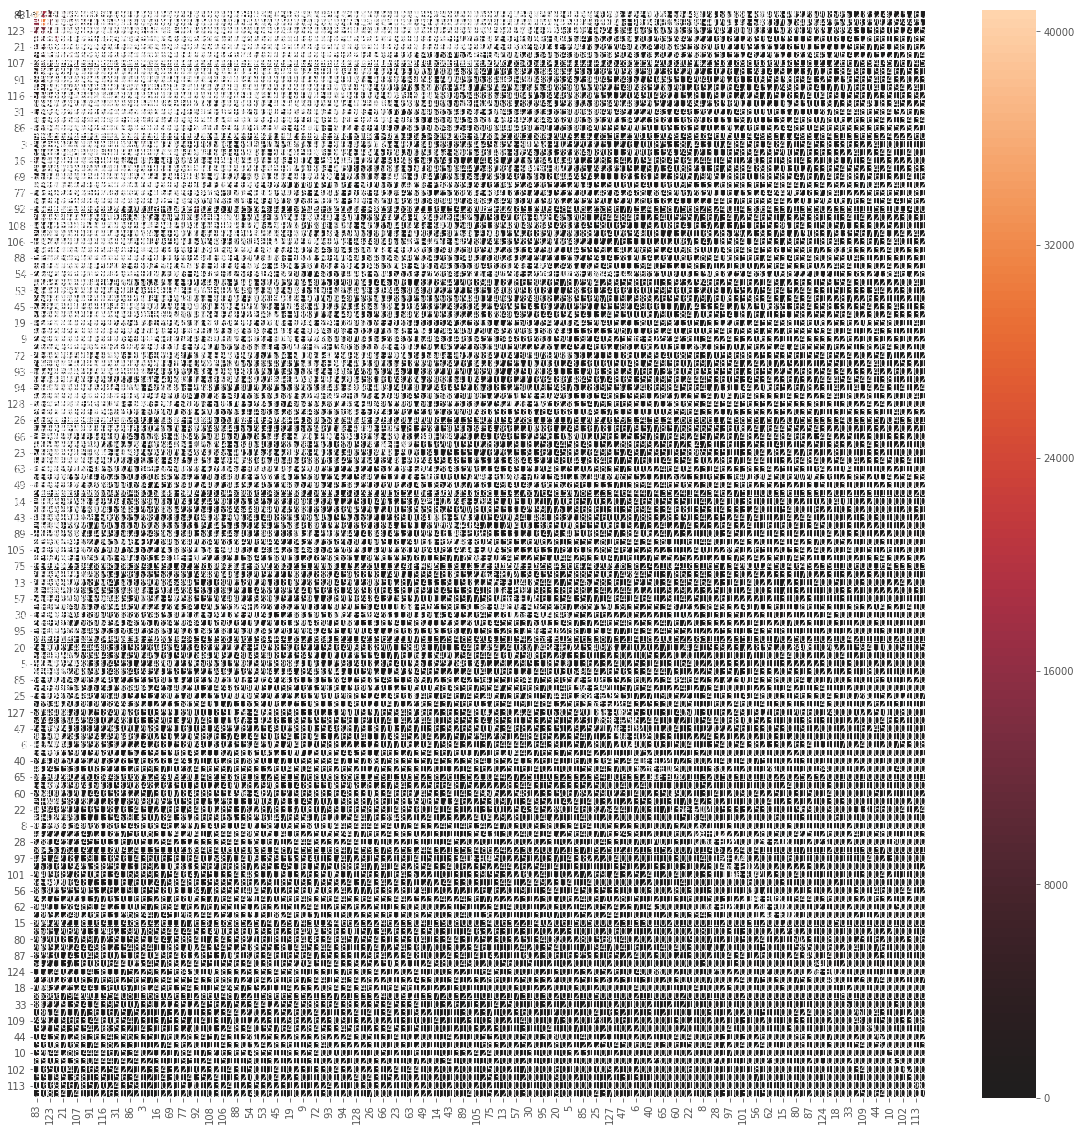

In [186]:
fig, ax = plt.subplots(figsize=(20,20))
sbn.heatmap(comp_df, ax=ax,vmin=0,center=0, annot=True, linewidths=.5)

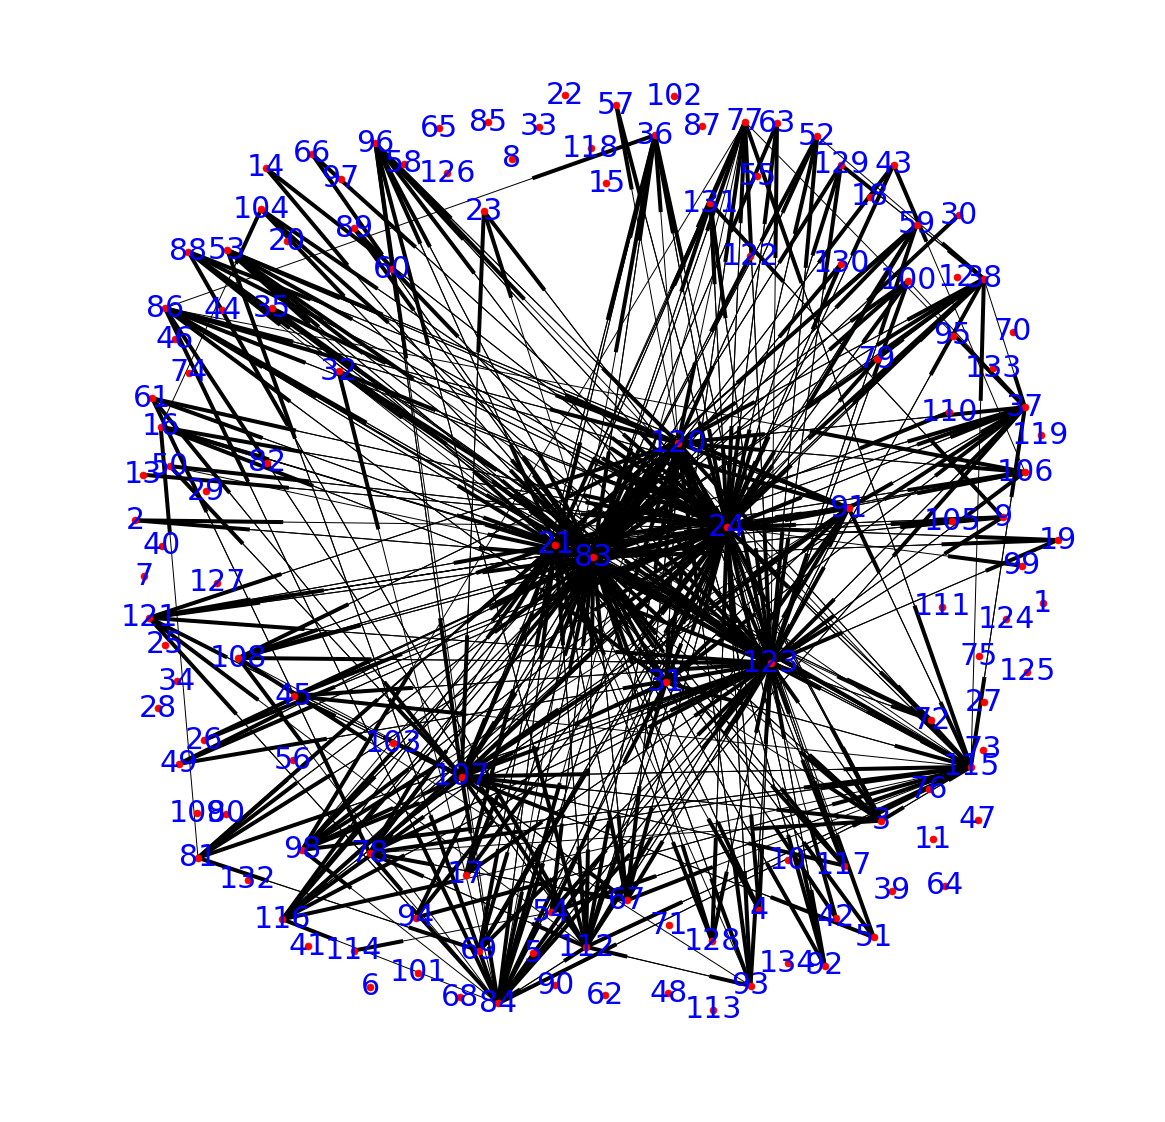

In [184]:
g = nx.DiGraph()
g.add_nodes_from(AA.keys())

for rec in AA:
    for a in AA[rec]:
        if AA[rec][a] > 300:
            g.add_edge(rec, a)
g.edges(data=True)
gfig, gax = plt.subplots(figsize=(20,20))
nx.draw(g,nx.spring_layout(g,k=1,iterations=20),ax=gax,with_labels=True,font_size=30,node_size=50,font_color='blue')

In [176]:
aisles.head()

aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation